In [72]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import date,timedelta
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

filter_date = date.today()-timedelta(2)


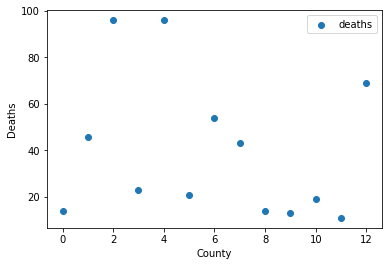

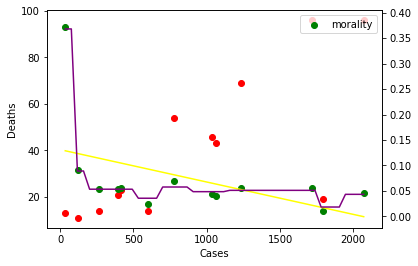

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:61: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
No handles with labels found to put in legend.


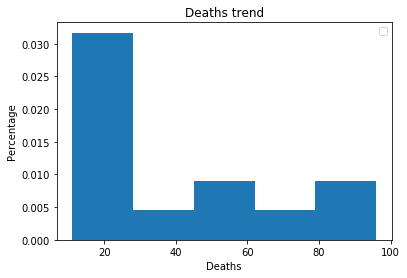

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
No handles with labels found to put in legend.


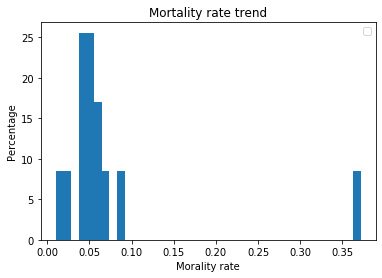

In [79]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv",encoding = "ISO-8859-1")

df['state_county']=df['state']+" "+df['county']
filter=df["state"].isin(['Colorado','Idaho','Utah'])

#filter=df["state"].isin(['Utah'])
df=df[filter]
filter=df["date"]==str(filter_date)
df=df[filter]

filter=df.groupby(['state_county'])['deaths'].max()>10
subset_df=filter.loc[filter.values==True]
result=pd.merge(df,subset_df,how='inner',on=['state_county'])
#print(result.head(5))
df=result[result['deaths_y']==True]
df=df.sort_values(['county'],ascending=True)

#print(df.head(25))
counties=df['state_county']
counties_index=np.arange(0,len(counties))
#print(counties[counties_index])
dates=np.array(df['date'])
deaths=np.array(df['deaths_x'])
cases=np.array(df['cases'])
mortality_rate=deaths/cases

#print(type(counties))
#print(deaths)
#print(morality_rate)

fig, ax = plt.subplots()
ax.scatter(counties_index,deaths,label='deaths')
ax.set_xlabel("County")
ax.set_ylabel("Deaths")
plt.legend()
plt.show()

model = linear_model.LinearRegression()
model.fit(cases.reshape(-1,1), morality_rate)

SEED=1
gbt=GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)
gbt.fit(cases.reshape(-1,1), morality_rate)  

prediction_space=np.linspace(min(cases),max(cases)).reshape(-1,1)



fig, ax = plt.subplots()
ax.scatter(cases,deaths,color='red',label='deaths')
ax.set_xlabel('Cases')
ax.set_ylabel('Deaths')
ax2=ax.twinx()
ax2.scatter(cases,mortality_rate,color='green',label='morality')
ax2.plot(prediction_space,model.predict(prediction_space),c="yellow")
ax2.plot(prediction_space,gbt.predict(prediction_space),c="purple")
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.hist(deaths,bins=5, normed=1)
ax.set_xlabel('Deaths')
ax.set_ylabel('Percentage')
ax.set_title('Deaths trend')
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.hist(mortality_rate,bins=40, normed=1)
ax.set_xlabel('Morality rate')
ax.set_ylabel('Percentage')
ax.set_title('Mortality rate trend')
plt.legend()
plt.show()